In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [2]:
clean_df = pd.read_csv('/data/tide/projects/ho_infxn_ml/clean_data/20240911/final_dataset_for_models_20240911.csv')
logit_df = pd.read_csv('~/hospital_onset_personal_folder/sensitivity_analysis_clr_coefficients.csv')

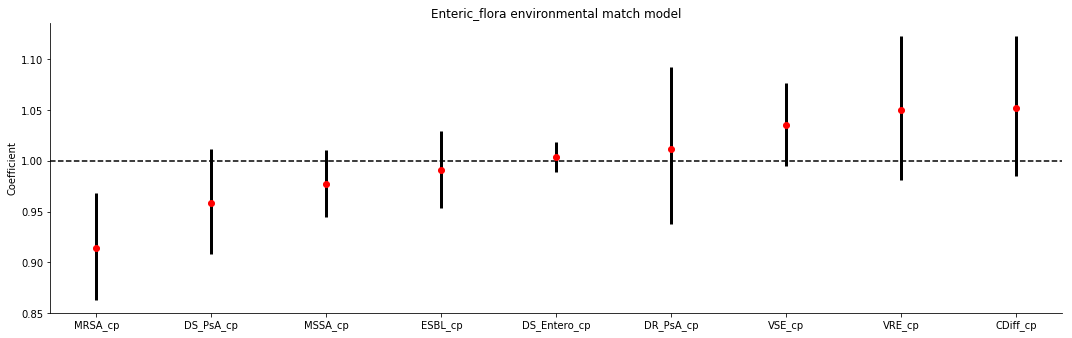

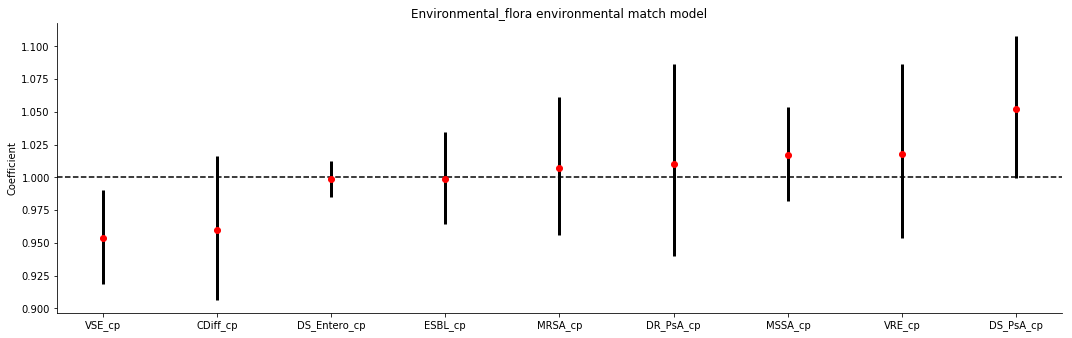

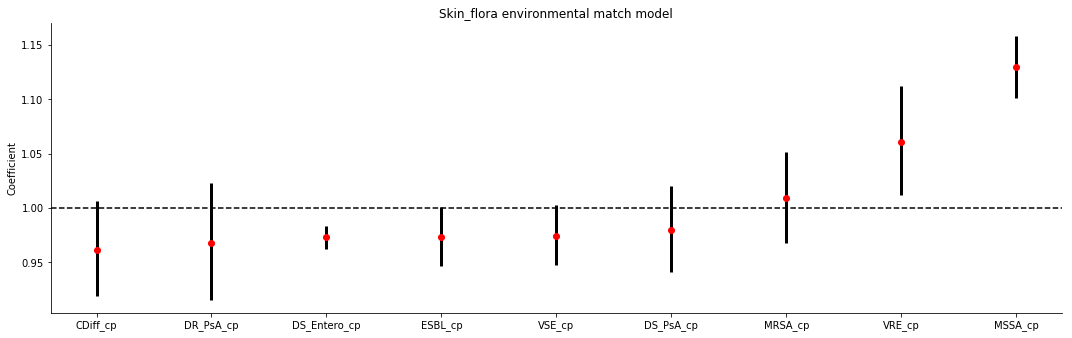

In [3]:
# Environmental Match Coef Plot

env_match_logit_df = logit_df[logit_df['match'] == 'environmental']

for target in env_match_logit_df['target'].unique():
    target_logit_df = env_match_logit_df[env_match_logit_df['target'] == target]
    target_logit_df = target_logit_df[~target_logit_df['variable'].str.startswith('prior')]
    target_logit_df = target_logit_df.sort_values(by = ['coef'], ascending=True)
    
    plt.figure(figsize=(15,4.8))
    ax = plt.subplot(111)
    plt.errorbar(target_logit_df['variable'], 
                 target_logit_df['coef'], 
                 yerr=[target_logit_df['coef'] - target_logit_df['lower_CI'],
                       target_logit_df['upper_CI'] - target_logit_df['coef']], 
                 fmt='o', 
                 capsize=0, 
                 color='r', 
                 ecolor='black',
                 lw=3)
    plt.axhline(y = 1.0, 
                linestyle = '--',
                color = 'k')
    plt.title(f'{target} environmental match model')
    plt.ylabel('Coefficient')
    # plt.text(1,max(target_logit_df['upper_CI']) + 0.05,'*',weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(f'/PHShome/zw852/hospital_onset_personal_folder/Sensitivity_Analysis/clr_coef_plots/environmental/{target}.png')

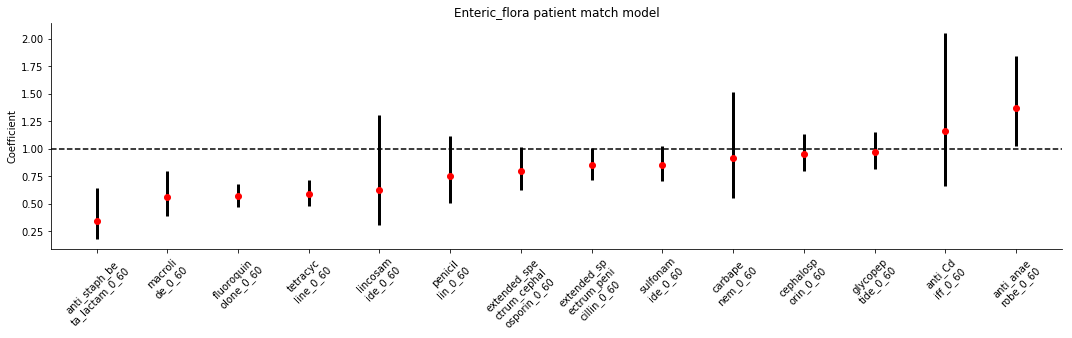

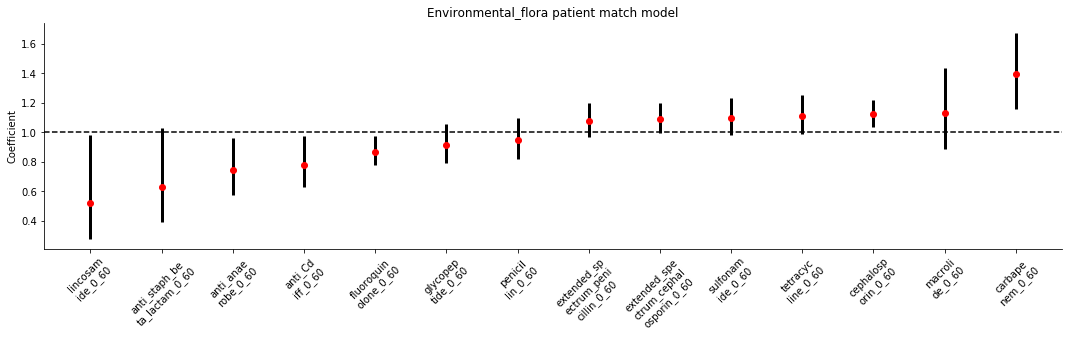

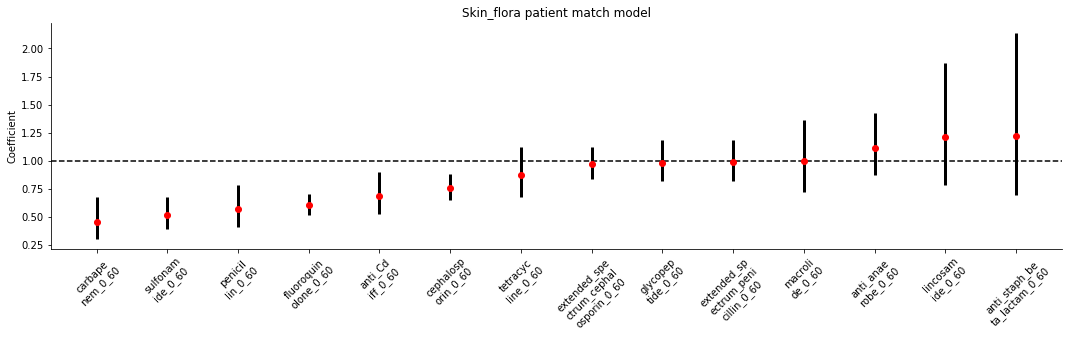

In [4]:
# Patient Match Coef Plot

patient_match_logit_df = logit_df[logit_df['match'] == 'patient']

for target in patient_match_logit_df['target'].unique():
    target_logit_df = patient_match_logit_df[patient_match_logit_df['target'] == target]
    target_logit_df = target_logit_df[target_logit_df['variable'].str.endswith('_0_60')]
    target_logit_df = target_logit_df.sort_values(by = ['coef'], ascending=True)
    
    plt.figure(figsize=(15,4.8))
    ax = plt.subplot(111)
    
    labels = []
    for name in target_logit_df['variable']:
        if len(name) <= 30:
            labels.append(name[:len(name)//2] + '\n' + name[len(name)//2:]) 
        else:
            labels.append(name[:len(name)//3] + '\n' + name[len(name)//3:2 * len(name)//3] + '\n' + name[2 * len(name)//3 : ]) 
    
    plt.errorbar(labels, 
                 target_logit_df['coef'], 
                 yerr=[target_logit_df['coef'] - target_logit_df['lower_CI'],
                       target_logit_df['upper_CI'] - target_logit_df['coef']], 
                 fmt='o', 
                 capsize=0, 
                 color='r', 
                 ecolor='black',
                 lw=3)
    plt.axhline(y = 1.0, 
                linestyle = '--',
                color = 'k')
    plt.ylabel('Coefficient')
    plt.xticks(rotation = 45)
    plt.title(f'{target} patient match model')
    # plt.text(1,max(target_logit_df['upper_CI']) + 0.05,'*',weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(f'/PHShome/zw852/hospital_onset_personal_folder/Sensitivity_Analysis/clr_coef_plots/patient/{target}.png')
    

In [5]:
## CLR Logit Heatmap
env_match_logit_df['sig_direction'] = np.where((env_match_logit_df['sig_flag'] == '*') & (env_match_logit_df['coef'] > 1), 1, np.where((env_match_logit_df['sig_flag'] == '*') & (env_match_logit_df['coef'] < 1),-1,0))

env_match_logit_df

/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,match,target,variable,coef,lower_CI,upper_CI,SE_coef,pval,sig_flag,sig_direction
0,environmental,Enteric_flora,prior_Enteric_flora,72.189505,0.605491,8606.768213,2.439335,7.938132e-02,NaN,0
1,environmental,Enteric_flora,CDiff_cp,1.051990,0.985448,1.123025,0.033339,1.284446e-01,NaN,0
2,environmental,Enteric_flora,MSSA_cp,0.977243,0.944540,1.011078,0.017366,1.849782e-01,NaN,0
3,environmental,Enteric_flora,MRSA_cp,0.914492,0.863320,0.968696,0.029379,2.346183e-03,*,-1
4,environmental,Enteric_flora,DS_Entero_cp,1.003741,0.988974,1.018729,0.007562,6.214244e-01,NaN,0
5,environmental,Enteric_flora,ESBL_cp,0.990872,0.953745,1.029445,0.019485,6.379226e-01,NaN,0
6,environmental,Enteric_flora,VSE_cp,1.035111,0.995235,1.076585,0.020044,8.512734e-02,NaN,0
7,environmental,Enteric_flora,VRE_cp,1.049861,0.981392,1.123106,0.034409,1.573369e-01,NaN,0
8,environmental,Enteric_flora,DS_PsA_cp,0.958499,0.908066,1.011733,0.027578,1.242929e-01,NaN,0
9,environmental,Enteric_flora,DR_PsA_cp,1.012206,0.937679,1.092657,0.039021,7.558652e-01,NaN,0


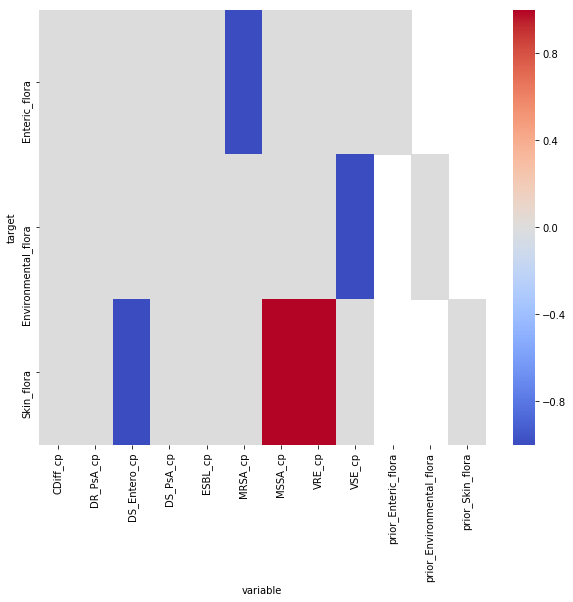

In [6]:
heatmap_df = env_match_logit_df.pivot(index='target',
                         columns='variable', 
                         values='sig_direction')
# heatmap_df = heatmap_df.fillna(-10)

plt.figure(figsize = (10,8))
sns.heatmap(heatmap_df, cmap = 'coolwarm')
plt.show()

/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


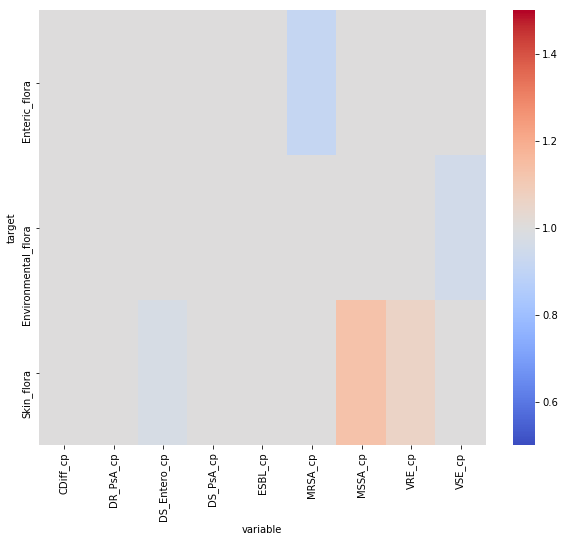

In [7]:
heatmap_df = env_match_logit_df[env_match_logit_df['variable'].isin(['CDiff_cp', 'DR_PsA_cp', 'DS_Entero_cp', 'DS_PsA_cp',
                    'ESBL_cp', 'MRSA_cp', 'MSSA_cp', 'VRE_cp', 'VSE_cp'])]

heatmap_df['sig_continuous'] = heatmap_df['coef']
heatmap_df['sig_continuous'] = np.where(heatmap_df['sig_flag'] == '*',heatmap_df['sig_continuous'],1 )

heatmap_df = heatmap_df.pivot(index='target',
                              columns='variable', 
                              values='sig_continuous')

# heatmap_df = heatmap_df.fillna(-10)

plt.figure(figsize = (10,8))
sns.heatmap(heatmap_df, 
            cmap = 'coolwarm',
            vmin = 0.5, 
            vmax = 1.5, 
            center = 1)
plt.show()

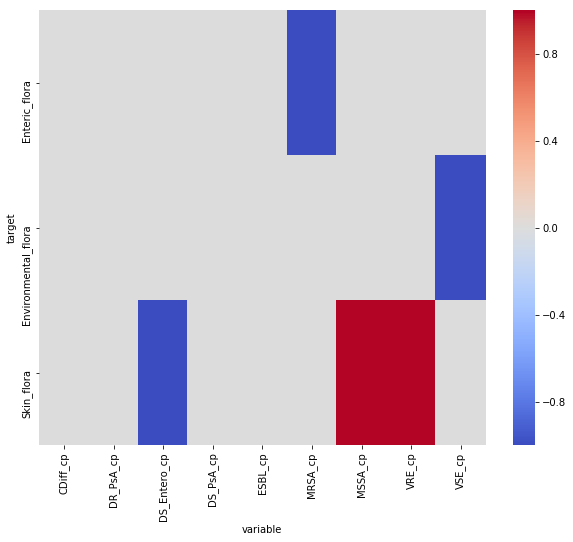

In [8]:
heatmap_df = env_match_logit_df[env_match_logit_df['variable'].isin(['CDiff_cp', 'DR_PsA_cp', 'DS_Entero_cp', 'DS_PsA_cp',
                    'ESBL_cp', 'MRSA_cp', 'MSSA_cp', 'VRE_cp', 'VSE_cp'])]

heatmap_df = heatmap_df.pivot(index='target',
                         columns='variable', 
                         values='sig_direction')
# heatmap_df = heatmap_df.fillna(-10)

plt.figure(figsize = (10,8))
sns.heatmap(heatmap_df, cmap = 'coolwarm')
plt.show()